<h1 style="color: #004080;">1. Churn Prediction in the FinTech Domain: A Case Study</h1>

<h2 style="color: #006699;">Introduction</h2>

<p>Customer churn prediction is a <strong>critical task</strong> in the FinTech domain, where businesses aim to <strong>understand and mitigate</strong> the risk of losing valuable customers. Churn prediction models help organizations identify customers who are likely to <strong>stop using</strong> their services or products, allowing them to take <strong>proactive measures</strong> to <strong>retain</strong> these customers.</p>

<p>In this case study, we will explore the process of building a churn prediction model using <strong>machine learning techniques</strong>. We will leverage a dataset containing information about customers of a FinTech company, including <strong>demographic data</strong>, <strong>service usage patterns</strong>, and <strong>churn status</strong>.</p>

<h2 style="color: #006699;">Problem Statement</h2>

<p>The <strong>primary objective</strong> of this project is to develop a <strong>robust churn prediction model</strong> that can accurately identify customers who are at risk of churning. By proactively identifying these customers, the FinTech company can implement <strong>targeted retention strategies</strong> to <strong>minimize churn</strong> and <strong>maximize customer lifetime value</strong>.</p>

<h2 style="color: #006699;">Data Description</h2>

<ul>
  <li><strong>Data Source:</strong> Telco Customer Churn Dataset that we got it from Kaggle</li>
  <li><strong>Features:</strong> The dataset contains various features such as <strong>customer demographics</strong>, <strong>service usage patterns</strong>, <strong>contract details</strong>, and <strong>payment methods</strong>.</li>
  <li><strong>Target Variable:</strong> The target variable is '<strong>Churn</strong>', indicating whether a customer has churned or not.</li>
</ul>

<h2 style="color: #006699;">Approach</h2>

<ol>
  <li><strong>Data Preprocessing:</strong> We will start by <strong>exploring and preprocessing</strong> the dataset, which includes <strong>handling missing values</strong>, <strong>encoding categorical variables</strong>, and <strong>scaling numerical features</strong>.</li>
  <li><strong>Exploratory Data Analysis (EDA):</strong> We will conduct exploratory data analysis to gain insights into the <strong>distribution of features</strong>, identify <strong>correlations</strong>, and understand <strong>patterns related to churn</strong>.</li>
  <li><strong>Feature Engineering:</strong> We will perform feature engineering to create <strong>new features</strong> or transform existing ones to improve the <strong>predictive power</strong> of our model.</li>
  <li><strong>Model Development:</strong> We will experiment with different <strong>machine learning algorithms</strong> such as logistic regression, random forest, and gradient boosting to build our churn prediction model.</li>
  <li><strong>Model Evaluation:</strong> We will evaluate the performance of each model using appropriate evaluation metrics and techniques such as <strong>cross-validation</strong> and <strong>hyperparameter tuning</strong>.</li>
  <li><strong>Deployment:</strong> Once we have selected the <strong>best-performing model</strong>, we will <strong>deploy</strong> it to a production environment where it can be used to predict churn in <strong>real-time</strong>.</li>
</ol>

<h2 style="color: #006699;">Conclusion</h2>

<p>Churn prediction is a <strong>complex and challenging problem</strong> in the FinTech domain, but with the <strong>right approach and techniques</strong>, it is possible to develop <strong>effective models</strong> that can help businesses <strong>retain valuable customers</strong>. By leveraging <strong>machine learning</strong> and <strong>data-driven insights</strong>, organizations can gain a <strong>competitive edge</strong> and improve <strong>customer retention strategies</strong>.</p>



In [21]:
import warnings
warnings.filterwarnings('ignore')

import os 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

DATA_PATH = '../training/datasets/churn_data.csv'

<h1 style="color: #004080;">2. Data Preprocessing</h1>

In [22]:
churn_data = pd.read_csv(DATA_PATH)

In [23]:
# Display the shape of the dataset
print("Shape of the dataset:", churn_data.shape)


churn_data.replace(['', ' ', 'NA', 'null'], np.nan, inplace=True)
# Convert 'TotalCharges' to numeric
churn_data = churn_data.drop(columns=['customerID'])
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'])
# Display information about the columns
column_info = churn_data.dtypes.to_frame(name='Data Type')
column_info['Null Values'] = churn_data.isnull().sum()
column_info['Unique Values'] = churn_data.nunique()
column_info['Example Values'] = churn_data.iloc[0].values

# Display the column information
display(column_info)

# Split the data into train and test sets
X = churn_data.drop('Churn', axis=1)
y = churn_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape obf the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of the dataset: (7043, 21)


,Data Type,Null Values,Unique Values,Example Values
gender,object,0,2,Female
SeniorCitizen,int64,0,2,0
Partner,object,0,2,Yes
Dependents,object,0,2,No
tenure,int64,0,73,1
PhoneService,object,0,2,No
MultipleLines,object,0,3,No phone service
InternetService,object,0,3,DSL
OnlineSecurity,object,0,3,No
OnlineBackup,object,0,3,Yes


Shape of X_train: (5634, 19)
Shape of X_test: (1409, 19)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [24]:
X_train.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

<h1 style="color: #004080;">3. Exploratory Data Analysis</h1>

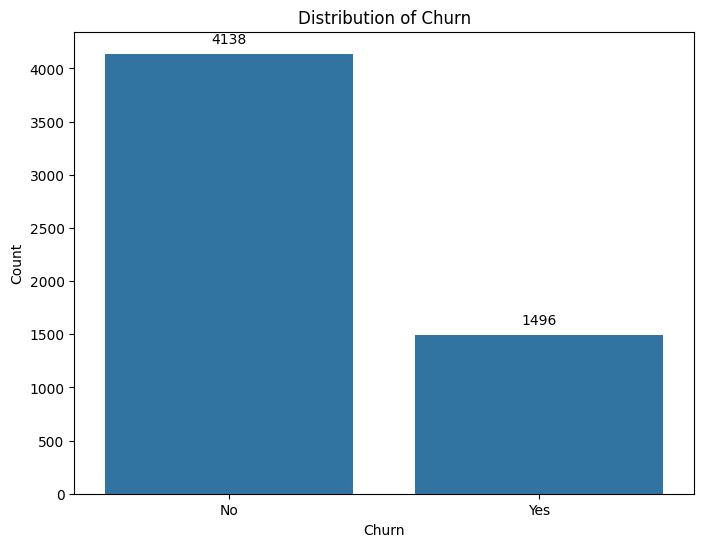

In [25]:
# Create count plot for churn distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_train)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [26]:
# combining labels and the main dataset
if isinstance(y_train, pd.Series):
    y_train = pd.DataFrame(y_train, columns=['Churn'])

# Combine x_train and y_train into a single DataFrame
churn_train_data = pd.concat([X_train, y_train], axis=1)

In [27]:
churn_train_data.shape

(5634, 20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,No
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
1362,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No



**Data Types and Null Values:**
<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMetho

None


**Summary Statistics for Numeric Variables:**


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5624.000000
mean,0.160809,32.373092,64.864253,2291.154605
std,0.367388,24.424539,30.089324,2263.151534
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.512500
50%,0.000000,29.000000,70.525000,1410.800000
75%,0.000000,55.000000,89.937500,3808.850000
max,1.000000,72.000000,118.600000,8684.800000


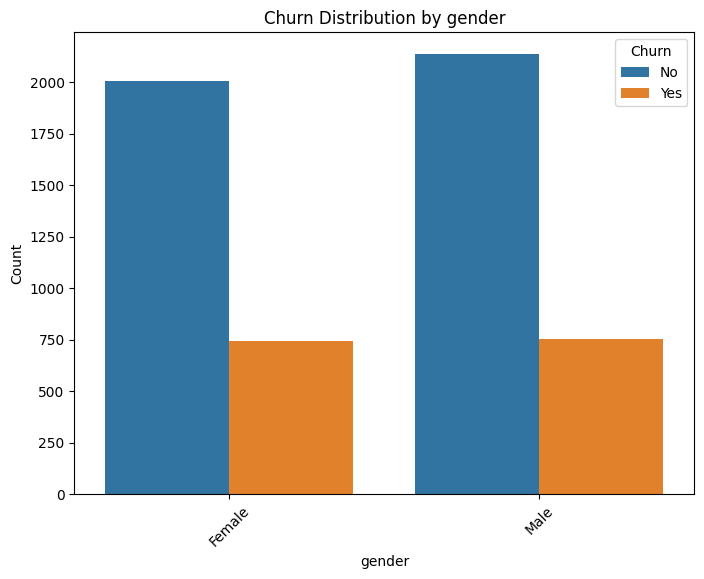

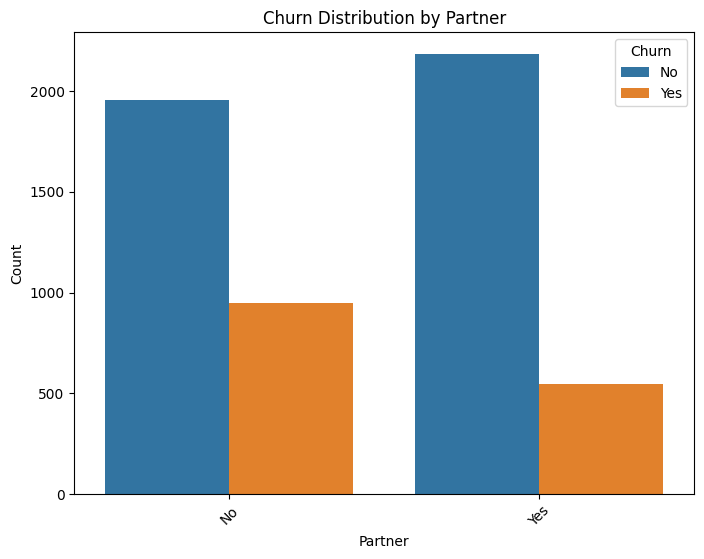

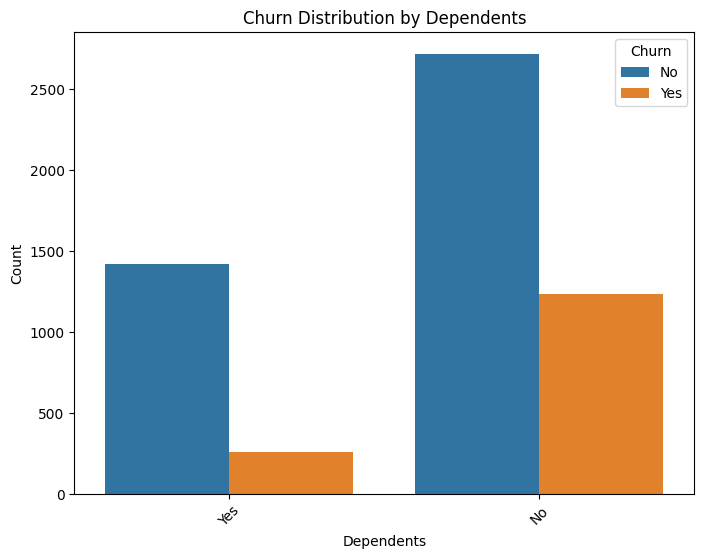

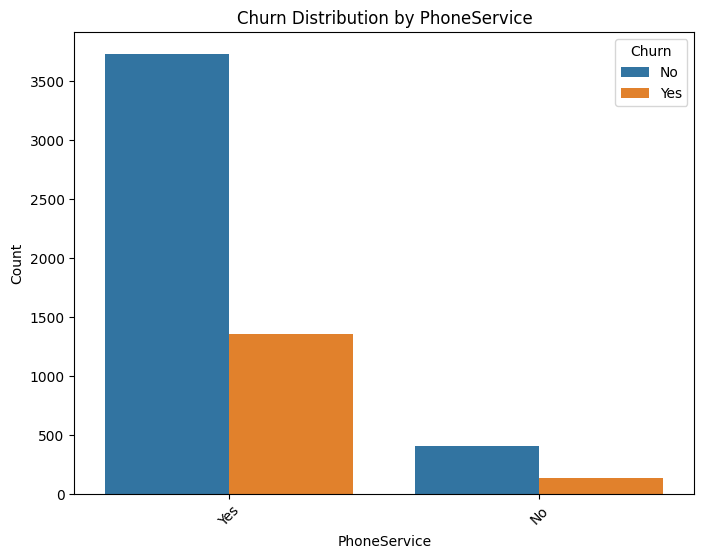

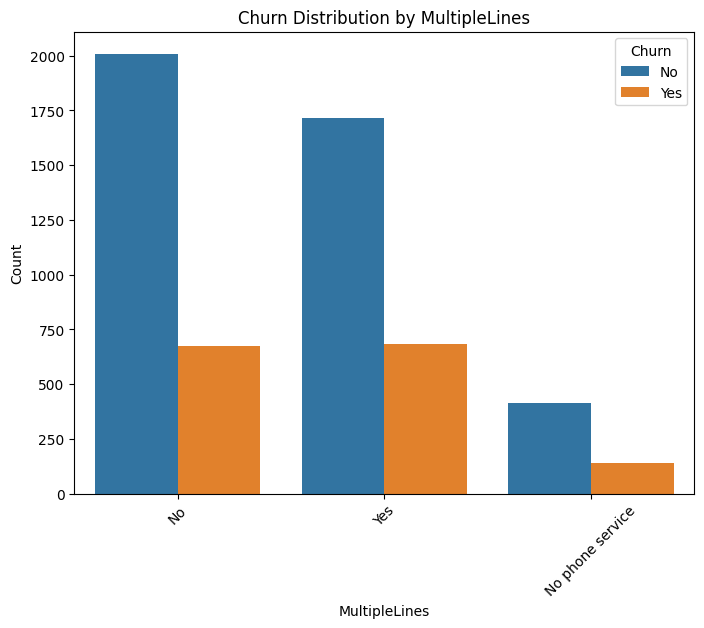

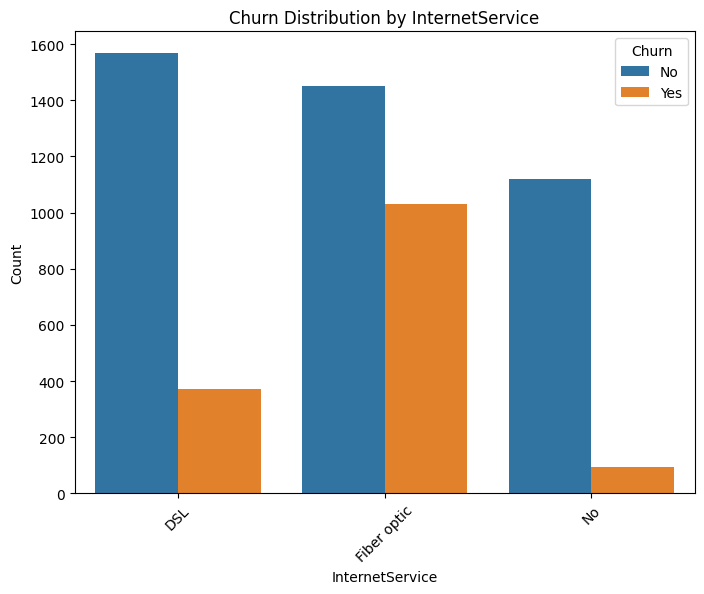

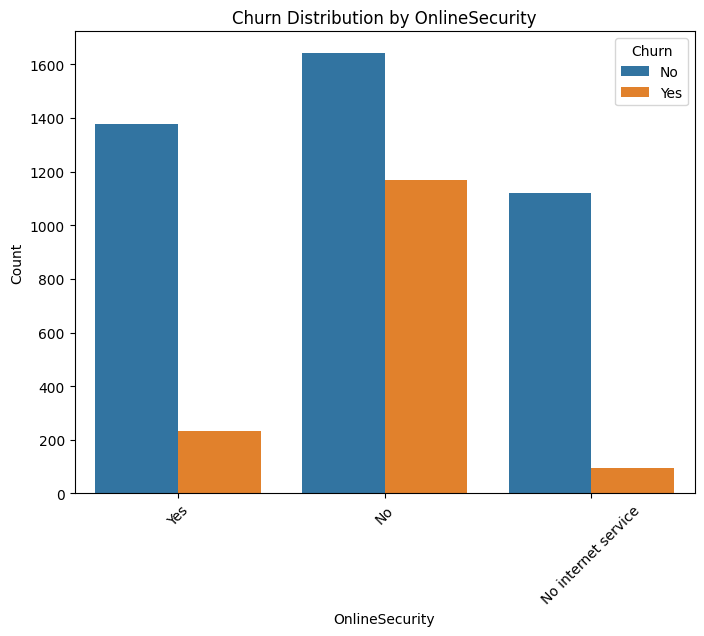

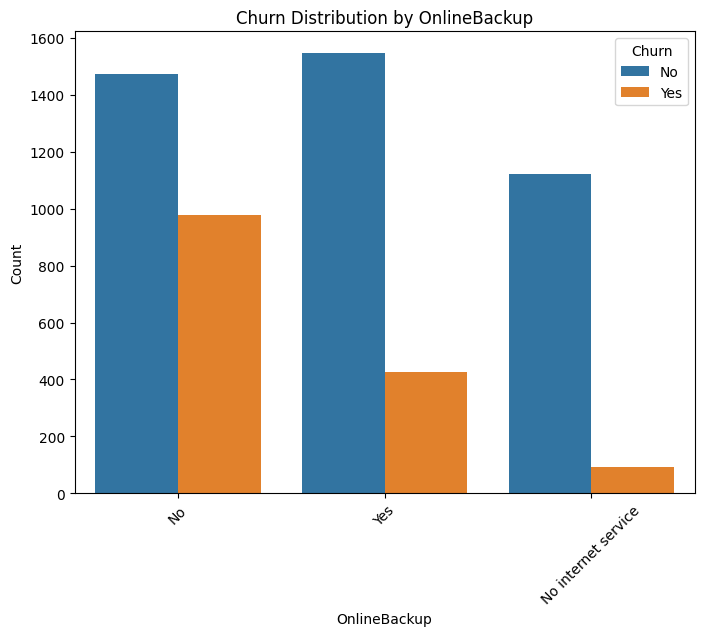

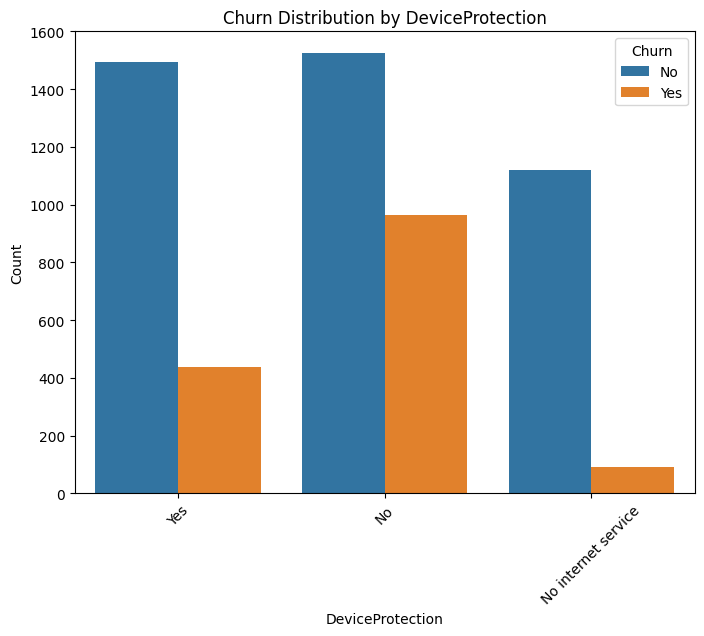

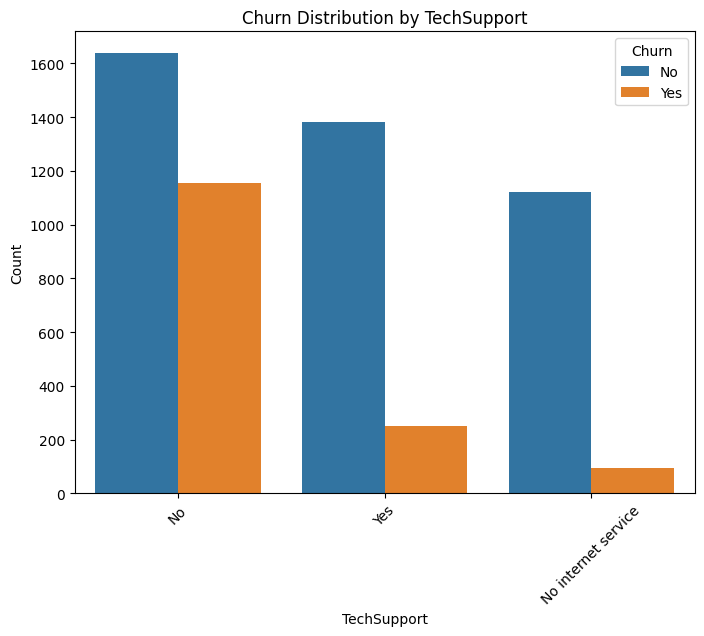

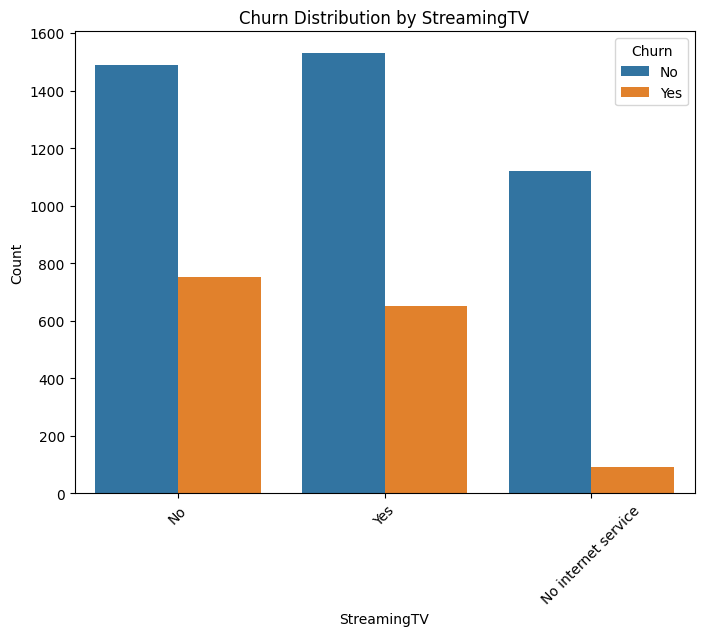

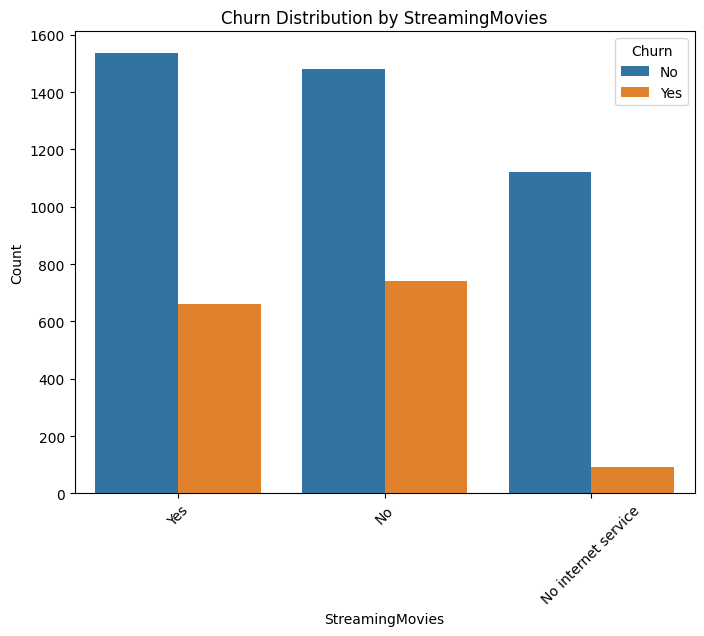

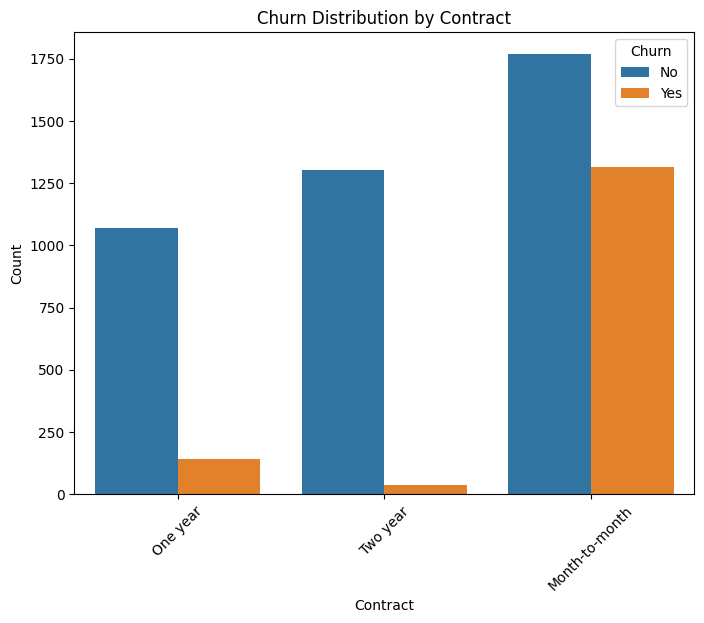

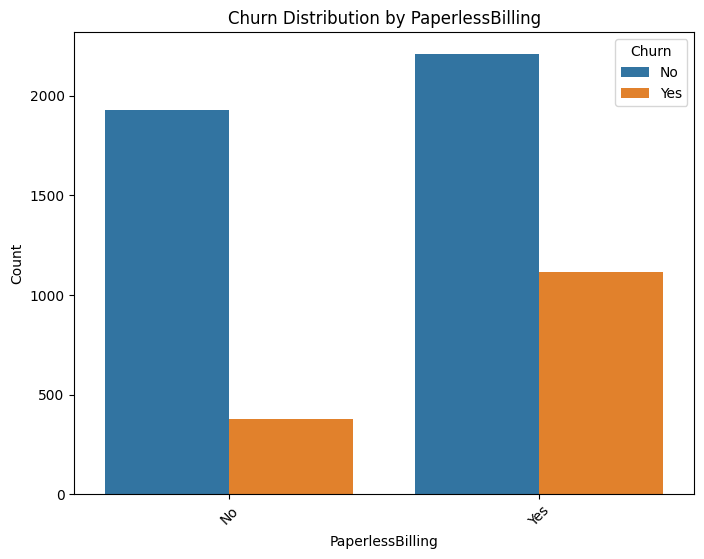

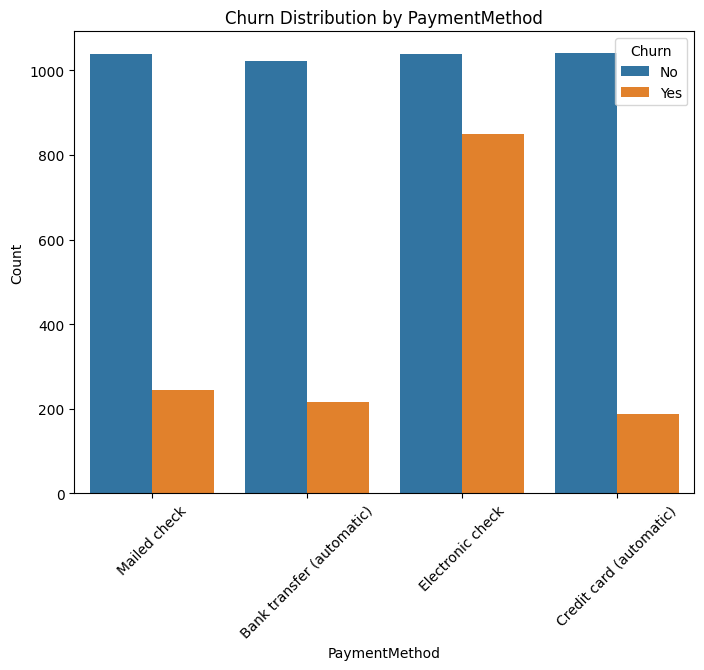

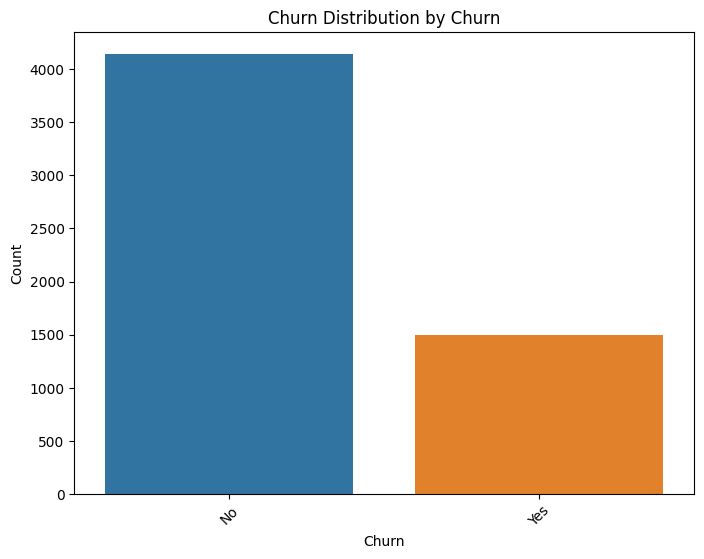


**Summary Statistics for Numeric Variables:**


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5624.000000
mean,0.160809,32.373092,64.864253,2291.154605
std,0.367388,24.424539,30.089324,2263.151534
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.512500
50%,0.000000,29.000000,70.525000,1410.800000
75%,0.000000,55.000000,89.937500,3808.850000
max,1.000000,72.000000,118.600000,8684.800000


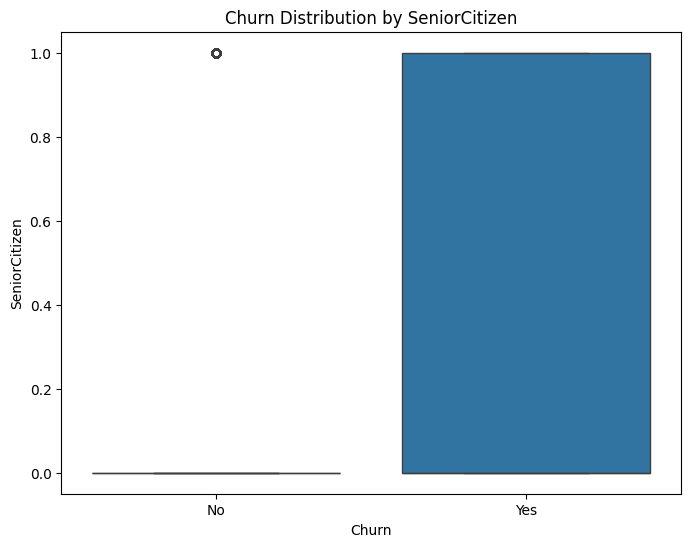

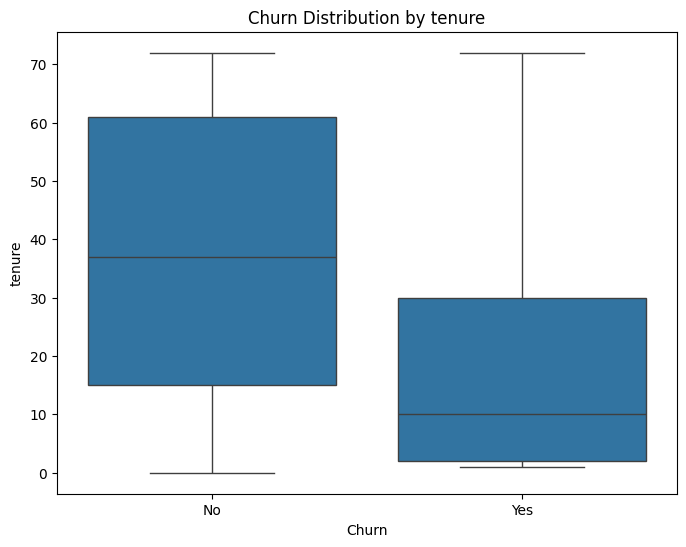

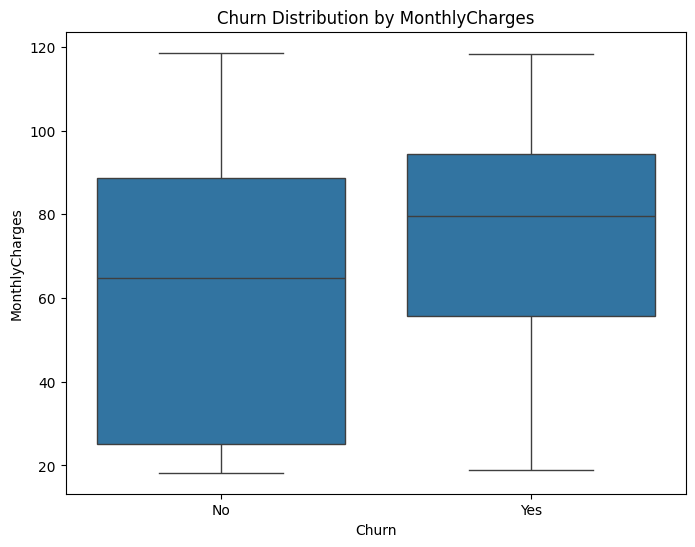

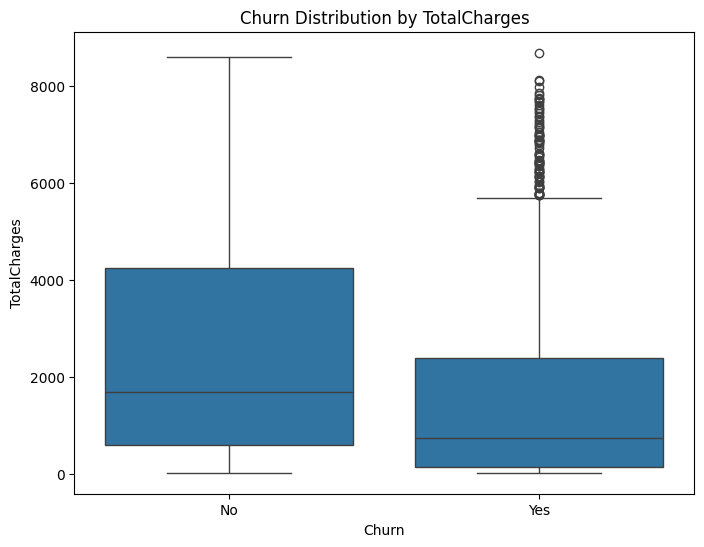

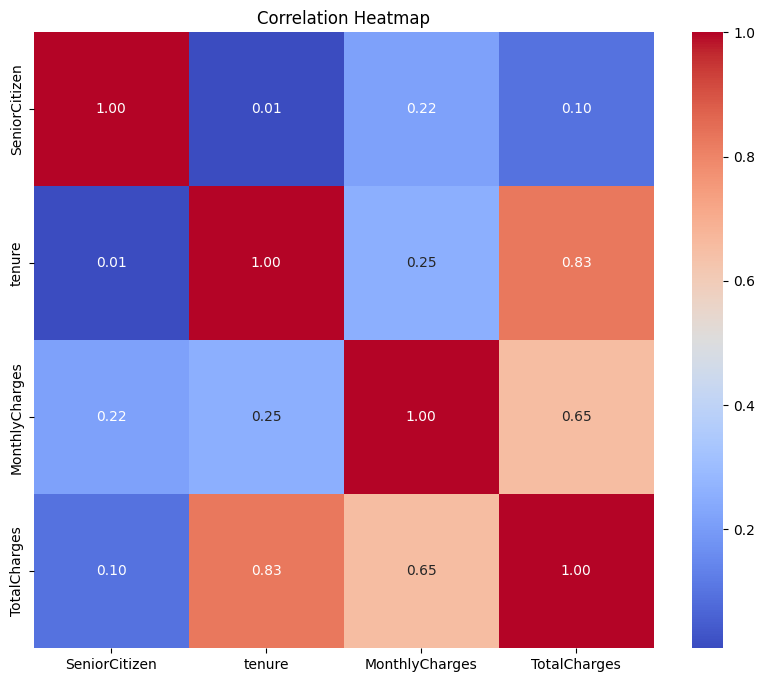

In [28]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Display the first few rows of the dataset
display(churn_train_data.head())

# Check data types and null values
print("\n**Data Types and Null Values:**")
display(churn_train_data.info())

# Summary statistics for numeric variables
print("\n**Summary Statistics for Numeric Variables:**")
display(churn_train_data.describe())

# Univariate analysis for categorical variables
cat_cols = churn_train_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Churn', data=churn_train_data)
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Drop non-numeric columns
numeric_columns = churn_train_data.select_dtypes(include=['int64', 'float64']).columns
churn_train_data_numeric = churn_train_data[numeric_columns]

# Summary statistics for numeric variables
print("\n**Summary Statistics for Numeric Variables:**")
display(churn_train_data_numeric.describe())

# Bivariate analysis for numeric variables
for col in churn_train_data_numeric.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=col, data=churn_train_data)
    plt.title(f'Churn Distribution by {col}')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

# Correlation heatmap for numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(churn_train_data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h2 style="color: #004080;">Exploratory Analysis Summary</h2>

<h3 style="color: #008CBA;">Analysis Findings</h3>

In this exploratory analysis of the Telco customer churn dataset, several key points were identified:

1. **Customer Account Information:** This category encompasses details related to the customer's account, including the contract type, payment method, paperless billing status, tenure, monthly charges, and total charges.

2. **Demographics:** Demographic information about the customers, such as whether they are dependents and whether they are senior citizens, was analyzed.

3. **Services Signed Up For:** The services that each customer has signed up for, including phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming TV, and streaming movies.

4. **Imbalanced Data:** The analysis revealed that the dataset is highly imbalanced, with a significantly larger number of instances belonging to one class (e.g., non-churners) compared to the other class (e.g., churners). This imbalance needs to be addressed during feature engineering and model training to prevent biased predictions.

<h3 style="color: #008CBA;">Key Findings</h3>

- **High Correlation and Diversity:** The customer account information and demographics categories exhibited high correlation and diversity across different levels in the categorical features. This suggests that these features are crucial for understanding and predicting churn behavior.
  
- **Feature Selection:** Eight features were selected for machine learning model building. These features were chosen based on their relevance to churn prediction and their ability to capture key aspects of customer behavior. The selected features include:
  1. Contract
  2. Payment Method
  3. Paperless Billing
  4. Tenure
  5. Monthly Charges
  6. Dependents
  7. Senior Citizen Status
  8. Total Charges

<h3 style="color: #008CBA;">Conclusion</h3>

The exploratory analysis highlighted the importance of customer account information and demographics in predicting churn. Additionally, it emphasized the need to handle data imbalance during feature engineering to ensure unbiased model predictions.



<h1 style="color: #004080;">4. Feature Engineering and Data Reduction</h1>

In [29]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN


In [30]:
X_train.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
dtype: int64

In [35]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

def select_top_features(X_train, y_train, n_select = 6):
    # Separate numerical and categorical features
    numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

    # Pipeline for numerical features
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Pipeline for categorical features
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ])

    # Column Transformer
    preprocessor = ColumnTransformer(/
        transformers=[
            ('num', numerical_pipeline, numerical_features),
            ('cat', categorical_pipeline, categorical_features)
        ])

    # Create a pipeline with preprocessing and feature selection
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_classif, k=n_select))
    ])

    # Fit the pipeline with training data
    pipeline.fit(X_train, y_train)

    # Get selected feature names
    selected_feature_names = []
    selected_features = pipeline.named_steps['feature_selection']
    all_feature_names = numerical_features + categorical_features
    mask = selected_features.get_support()

    for boolean, feature in zip(mask, all_feature_names):
        if boolean:
            selected_feature_names.append(feature)

    return selected_feature_names

# Example usage:
selected_features = select_top_features(X_train, y_train)
print("SELECTED FEAURES: ", selected_features)

SELECTED FEAURES:  ['tenure', 'TotalCharges', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract']


In [43]:
selected_columns = ['tenure', 'TotalCharges', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract']
train_data_set = pd.concat([X_train[selected_columns], y_train], axis = 1)
test_data_set = pd.concat([X_test[selected_columns], y_test], axis = 1)

In [44]:
train_data_set.to_csv('../training/datasets/train_data.csv')
test_data_set.to_csv('../training/datasets/test_data.csv')